# 17.2. Value Iteration

- https://d2l.ai/chapter_reinforcement-learning/value-iter.html

Discuss how to pick the best action for the robot at each state to maximize the return of the trajectory.

## 17.2.1. Stochastic Policy

A stochastic policy denoted as $\pi(a \mid s)$ (policy for short) is a conditional distribution over the actions $a \in \mathcal{A}$ given the state $s \in \mathcal{S}$, $\pi(a \mid s) \equiv P(a \mid s)$.

As an example, if the robot has four actions $\mathcal{A}=$ {go left, go down, go right, go up}. The policy at a state $s \in \mathcal{S}$ for such a set of actions $\mathcal{A}$ is a categorical distribution where the probabilities of the four actions could be $[0.4, 0.2, 0.1, 0.3]$; at some other state $s' \in \mathcal{S}$ the probabilities $\pi(a \mid s')$ of the same four actions could be $[0.1, 0.1, 0.2, 0.6]$.

Note that we should have $\sum_a \pi(a \mid s) = 1$ for any state $s$.

A deterministic policy is a special case of a stochastic policy in that the distribution $\pi(a \mid s)$ only gives non-zero probability to one particular action, e.g., $[1, 0, 0, 0]$ for our example with four actions.

To make the notation less cumbersome, we will often write $\pi(s)$ as the conditional distribution instead of $\pi(a \mid s)$.

## 17.2.2. Value Function

magine now that the robot starts at a state $s_0$ and at each time instant, it first samples an action from the policy $a_t \sim \pi(s_t)$ and takes this action to result in the next state $s_{t+1}$. The trajectory $\tau = (s_0, a_0, r_0, s_1, a_1, r_1, \ldots)$, can be different depending upon which particular action $a_t$ is sampled at intermediate instants.

We define the average *return* $R(\tau) = \sum_{t=0}^\infty \gamma^t r(s_t, a_t)$ of all such trajectories
$$V^\pi(s_0) = E_{a_t \sim \pi(s_t)} \Big[ R(\tau) \Big] = E_{a_t \sim \pi(s_t)} \Big[ \sum_{t=0}^\infty \gamma^t r(s_t, a_t) \Big],$$

where $s_{t+1} \sim P(s_{t+1} \mid s_t, a_t)$ is the next state of the robot and $r(s_t, a_t)$ is the instantaneous reward obtained by taking action $a_t$ in state $s_t$ at time $t$.

This is called the "value function" for the policy $\pi$. In simple words, the value of a state $s_0$ for a policy $\pi$, denoted by $V^\pi(s_0)$, is the expected $\gamma$-discounted *return* obtained by the robot if it begins at state $s_0$ and takes actions from the policy $\pi$ at each time instant.

We next break down the trajectory into two stages (i) the first stage which corresponds to $s_0 \to s_1$ upon taking the action $a_0$, and (ii) a second stage which is the trajectory $\tau' = (s_1, a_1, r_1, \ldots)$ thereafter. The key idea behind all algorithms in reinforcement learning is that the value of state $s_0$ can be written as the average reward obtained in the first stage and the value function averaged over all possible next states $s_1$.

Mathematically, we write the two stages as

$$V^\pi(s_0) = r(s_0, a_0) + \gamma\ E_{a_0 \sim \pi(s_0)} \Big[ E_{s_1 \sim P(s_1 \mid s_0, a_0)} \Big[ V^\pi(s_1) \Big] \Big].$$

This decomposition is very powerful: it is the foundation of the principle of dynamic programming upon which all reinforcement learning algorithms are based. Notice that the second stage gets two expectations, one over the choices of the action $a_0$ taken in the first stage using the stochastic policy and another over the possible states $s_1$ obtained from the chosen action. We can write this equation using the transition probabilities in the Markov decision process (MDP) as

$$V^\pi(s) = \sum_{a \in \mathcal{A}} \pi(a \mid s) \Big[ r(s,  a) + \gamma\  \sum_{s' \in \mathcal{S}} P(s' \mid s, a) V^\pi(s') \Big];\ \textrm{for all } s \in \mathcal{S}.$$

An important thing to notice here is that the above identity holds for all states $s \in \mathcal{S}$ because we can think of any trajectory that begins at that state and break down the trajectory into two stages.

## 17.2.3. Action-Value Function

In implementations, it is often useful to maintain a quantity called the "action value" function which is a closely related quantity to the value function. This is defined to be the average *return* of a trajectory that begins at $s_0$ but when the action of the first stage is fixed to be $a_0$

$$Q^\pi(s_0, a_0) = r(s_0, a_0) + E_{a_t \sim \pi(s_t)} \Big[ \sum_{t=1}^\infty \gamma^t r(s_t, a_t) \Big],$$

note that the summation inside the expectation is from $t=1,\ldots, \infty$ because the reward of the first stage is fixed in this case. We can again break down the trajectory into two parts and write

$$Q^\pi(s, a) = r(s, a) + \gamma \sum_{s' \in \mathcal{S}} P(s' \mid s, a) \sum_{a' \in \mathcal{A}} \pi(a' \mid s')\ Q^\pi(s', a');\ \textrm{ for all } s \in \mathcal{S}, a \in \mathcal{A}.$$

## 17.2.4. Optimal Stochastic Policy

Both the value function and the action-value function depend upon the policy that the robot chooses. We will next think of the "optimal policy" that achieves the maximal average *return*
$$\pi^* = \underset{\pi}{\mathrm{argmax}} V^\pi(s_0).$$

Of all possible stochastic policies that the robot could have taken, the optimal policy $\pi^*$  achieves the largest average discounted *return* for trajectories starting from state $s_0$. Let us denote the value function and the action-value function of the optimal policy as $V^* \equiv V^{\pi^*}$ and $Q^* \equiv Q^{\pi^*}$.

Let us observe that for a deterministic policy where there is only one action that is possible under the policy at any given state. This gives us

$$\pi^*(s) = \underset{a \in \mathcal{A}}{\mathrm{argmax}} \Big[ r(s, a) + \gamma \sum_{s' \in \mathcal{S}} P(s' \mid s, a)\ V^*(s') \Big].$$

A good mnemonic to remember this is that the optimal action at state $s$ (for a deterministic policy) is the one that maximizes the sum of reward $r(s, a)$ from the first stage and the average *return* of the trajectories starting from the next sate $s'$, averaged over all possible next states $s'$ from the second stage.

## 17.2.5. Principle of Dynamic Programming

How about an algorithm to compute the optimal value function $V^*$ or the action-value function $Q^*$, respectively?

Observe that $$ V^*(s) = \sum_{a \in \mathcal{A}} \pi^*(a \mid s) \Big[ r(s,  a) + \gamma\  \sum_{s' \in \mathcal{S}} P(s' \mid s, a) V^*(s') \Big];\ \textrm{for all } s \in \mathcal{S}.$$

For a deterministic optimal policy $\pi^*$, since there is only one action that can be taken at state $s$, we can also write 

$$V^*(s) = \mathrm{argmax}_{a \in \mathcal{A}} \Big\{ r(s,a) + \gamma \sum_{s' \in \mathcal{S}} P(s' \mid s, a) V^*(s') \Big\}$$

for all states $s \in \mathcal{S}$. This identity is called the "principle of dynamic programming". It was formulated by Richard Bellman in 1950s and we can remember it as "the remainder of an optimal trajectory is also optimal".

## 17.2.6. Value Iteration

We can turn the principle of dynamic programming into an algorithm for finding the optimal value function called value iteration.  The key idea behind value iteration is to think of this identity as a set of constraints that tie together $V^*(s)$ at different states $s \in \mathcal{S}$. We initialize the value function to some arbitrary values $V_0(s)$ for all states $s \in \mathcal{S}$. At the $k^{\textrm{th}}$ iteration, the Value Iteration algorithm updates the value function as

$$V_{k+1}(s) = \max_{a \in \mathcal{A}} \Big\{ r(s,  a) + \gamma\  \sum_{s' \in \mathcal{S}} P(s' \mid s, a) V_k(s') \Big\};\ \textrm{for all } s \in \mathcal{S}.$$

It turns out that as $k \to \infty$ the value function estimated by the Value Iteration algorithm converges to the optimal value function irrespective of the initialization $V_0$,
$$V^*(s) = \lim_{k \to \infty} V_k(s);\ \textrm{for all states } s \in \mathcal{S}.$$

The same Value Iteration algorithm can be equivalently written using the action-value function as
$$Q_{k+1}(s, a) = r(s, a) + \gamma \max_{a' \in \mathcal{A}} \sum_{s' \in \mathcal{S}} P(s' \mid s, a) Q_k (s', a');\ \textrm{ for all } s \in \mathcal{S}, a \in \mathcal{A}.$$

In this case we initialize $Q_0(s, a)$ to some arbitrary values for all $s \in \mathcal{S}$ and $a \in \mathcal{A}$. Again we have $Q^*(s, a) = \lim_{k \to \infty} Q_k(s, a)$ for all $s \in \mathcal{S}$ and $a \in \mathcal{A}$.

## 17.2.7. Policy Evaluation

Value Iteration enables us to compute the optimal value function, i.e., $V^{\pi^*}$ of the optimal deterministic policy $\pi^*$. We can also use similar iterative updates to compute the value function associated with any other, potentially stochastic, policy $\pi$. We again initialize $V^\pi_0(s)$ to some arbitrary values for all states $s \in \mathcal{S}$ and at the $k^{\textrm{th}}$ iteration, perform the updates

$$    V^\pi_{k+1}(s) = \sum_{a \in \mathcal{A}} \pi(a \mid s) \Big[ r(s,  a) + \gamma\  \sum_{s' \in \mathcal{S}} P(s' \mid s, a) V^\pi_k(s') \Big];\ \textrm{for all } s \in \mathcal{S}.$$

This algorithm is known as policy evaluation and is useful to compute the value function given the policy. Again, it turns out that as $k \to \infty$ these updates converge to the correct value function irrespective of the initialization $V_0$,

$$V^\pi(s) = \lim_{k \to \infty} V^\pi_k(s);\ \textrm{for all states } s \in \mathcal{S}.$$

The algorithm for computing the action-value function $Q^\pi(s, a)$ of a policy $\pi$ is analogous.

## 17.2.8. Implementation of Value Iteration 

We next show how to implement Value Iteration for a navigation problem called FrozenLake from [Gymnasium](https://gymnasium.farama.org/).

- https://gymnasium.farama.org/environments/toy_text/frozen_lake/

In [ ]:
import random
import numpy as np
import torch

In [ ]:
seed = 0  # Random number generator seed
gamma = 0.95  # Discount factor
num_iters = 10  # Number of iterations
random.seed(seed)  # Set the random seed to ensure results can be reproduced
np.random.seed(seed)

In [ ]:
def frozen_lake(seed):
    """Defined in :numref:`sec_utils`"""
    # See https://www.gymnasium.farama.org/environments/toy_text/frozen_lake/ to learn more about this env
    import gymnasium as gym

    env = gym.make('FrozenLake-v1', is_slippery=False)
    env.reset(seed=seed)
    env.action_space.seed(seed)
    env_info = {}
    env_info['desc'] = env.unwrapped.desc  # 2D array specifying what each grid item means
    env_info['num_states'] = env.observation_space.n  # Number of observations/states or obs/state dim
    env_info['num_actions'] = env.action_space.n  # Number of actions or action dim
    # Define indices for (transition probability, nextstate, reward, done) tuple
    env_info['trans_prob_idx'] = 0  # Index of transition probability entry
    env_info['nextstate_idx'] = 1  # Index of next state entry
    env_info['reward_idx'] = 2  # Index of reward entry
    env_info['done_idx'] = 3  # Index of done entry
    env_info['mdp'] = {}
    env_info['env'] = env

    for s, others in env.unwrapped.P.items():
        # others(s) = {a0: [ (p(s'|s,a0), s', reward, done),...], a1:[...], ...}

        for a, pxrds in others.items():
            # (trainsition probability, next state, reward, termination flag)
            # pxrds is [(p1,next1,r1,d1),(p2,next2,r2,d2),..].
            # e.g. [(0.3, 0, 0, False), (0.3, 0, 0, False), (0.3, 4, 1, False)]
            env_info['mdp'][(s, a)] = pxrds

    return env_info

In [ ]:
env_info = frozen_lake(seed)

In the FrozenLake environment, the robot moves on a $4 \times 4$ grid (these are the states) with actions that are "up" ($\uparrow$), "down" ($\rightarrow$), "left" ($\leftarrow$), and "right" ($\rightarrow$). The environment contains a number of holes (H) cells and frozen (F) cells as well as a goal cell (G), all of which are unknown to the robot. To keep the problem simple, we assume the robot has reliable actions, i.e. $P(s' \mid s, a) = 1$ for all $s \in \mathcal{S}, a \in \mathcal{A}$. If the robot reaches the goal, the trial ends and the robot receives a reward of $1$ irrespective of the action; the reward at any other state is $0$ for all actions. The objective of the robot is to learn a policy that reaches the goal location (G) from a given start location (S) (this is $s_0$) to maximize the *return*.


In [ ]:
# In state 4, when take action 1
# transition probability=1.0
# next state = 8
# reward = 0
# termination = False
env_info['mdp'][(4, 1)]

[(1.0, 8, 0.0, False)]

In [ ]:
# In state 14, when take action 2
# transition probability=1.0
# next state = 15 (goal)
# reward = 1
# termination = True
env_info['mdp'][(14, 2)]

[(1.0, 15, 1.0, True)]

The following function implements Value Iteration, where `env_info` contains MDP and environment related information and `gamma` is the discount factor:

In [ ]:
def value_iteration(env_info, gamma, num_iters):
    env_desc = env_info['desc']  # 2D array shows what each item means
    prob_idx = env_info['trans_prob_idx']
    nextstate_idx = env_info['nextstate_idx']
    reward_idx = env_info['reward_idx']
    num_states = env_info['num_states']
    num_actions = env_info['num_actions']
    mdp = env_info['mdp']

    V  = np.zeros((num_iters + 1, num_states))
    Q  = np.zeros((num_iters + 1, num_states, num_actions))
    pi = np.zeros((num_iters + 1, num_states))

    for k in range(1, num_iters + 1):
        for s in range(num_states):
            for a in range(num_actions):
                # Calculate \sum_{s'} p(s'\mid s,a) [r + \gamma v_k(s')]
                for pxrds in mdp[(s,a)]:
                    # mdp(s,a): [(p1,next1,r1,d1),(p2,next2,r2,d2),..]
                    pr = pxrds[prob_idx]  # p(s'\mid s,a)
                    nextstate = pxrds[nextstate_idx]  # Next state
                    reward = pxrds[reward_idx]  # Reward
                    Q[k,s,a] += pr * (reward + gamma * V[k - 1, nextstate])
            # Record max value and max action
            V[k,s] = np.max(Q[k,s,:])
            pi[k,s] = np.argmax(Q[k,s,:])
    show_value_function_progress(env_desc, V[:-1], pi[:-1])

    return V, Q, pi

In [ ]:
import matplotlib.pyplot as plt

def show_value_function_progress(env_desc, V, pi):
    # This function visualizes how value and policy changes over time.
    # V: [num_iters, num_states]
    # pi: [num_iters, num_states]
    # How to visualize value function is adapted (but changed) from: https://sites.google.com/view/deep-rl-bootcamp/labs

    num_iters = V.shape[0]
    fig = plt.figure(figsize=(15, 15))
    axes = fig.subplots(4, 4)
    axes = axes.flatten()

    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.axis('off')

    for k in range(V.shape[0]):
        ax = axes[k]
        ax.imshow(V[k].reshape(4,4), cmap="bone")
        ax.set_xticks(np.arange(0, 5)-.5, minor=True)
        ax.set_yticks(np.arange(0, 5)-.5, minor=True)
        ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
        ax.tick_params(which="minor", bottom=False, left=False)
        ax.axis('on')

        # LEFT action: 0, DOWN action: 1
        # RIGHT action: 2, UP action: 3
        action2dxdy = {0:(-.25, 0),1: (0, .25),
                       2:(0.25, 0),3: (-.25, 0)}

        for y in range(4):
            for x in range(4):
                action = pi[k].reshape(4,4)[y, x]
                dx, dy = action2dxdy[action]

                if env_desc[y,x].decode() == 'H':
                    ax.text(x, y, str(env_desc[y,x].decode()),
                       ha="center", va="center", color="y",
                         size=20, fontweight='bold')

                elif env_desc[y,x].decode() == 'G':
                    ax.text(x, y, str(env_desc[y,x].decode()),
                       ha="center", va="center", color="w",
                         size=20, fontweight='bold')

                else:
                    ax.text(x, y, str(env_desc[y,x].decode()),
                       ha="center", va="center", color="g",
                         size=15, fontweight='bold')

                # No arrow for cells with G and H labels
                if env_desc[y,x].decode() != 'G' and env_desc[y,x].decode() != 'H':
                    ax.arrow(x, y, dx, dy, color='r', head_width=0.2, head_length=0.15)

        ax.set_title("Step = "  + str(k + 1), fontsize=20)

    fig.tight_layout()
    plt.show()

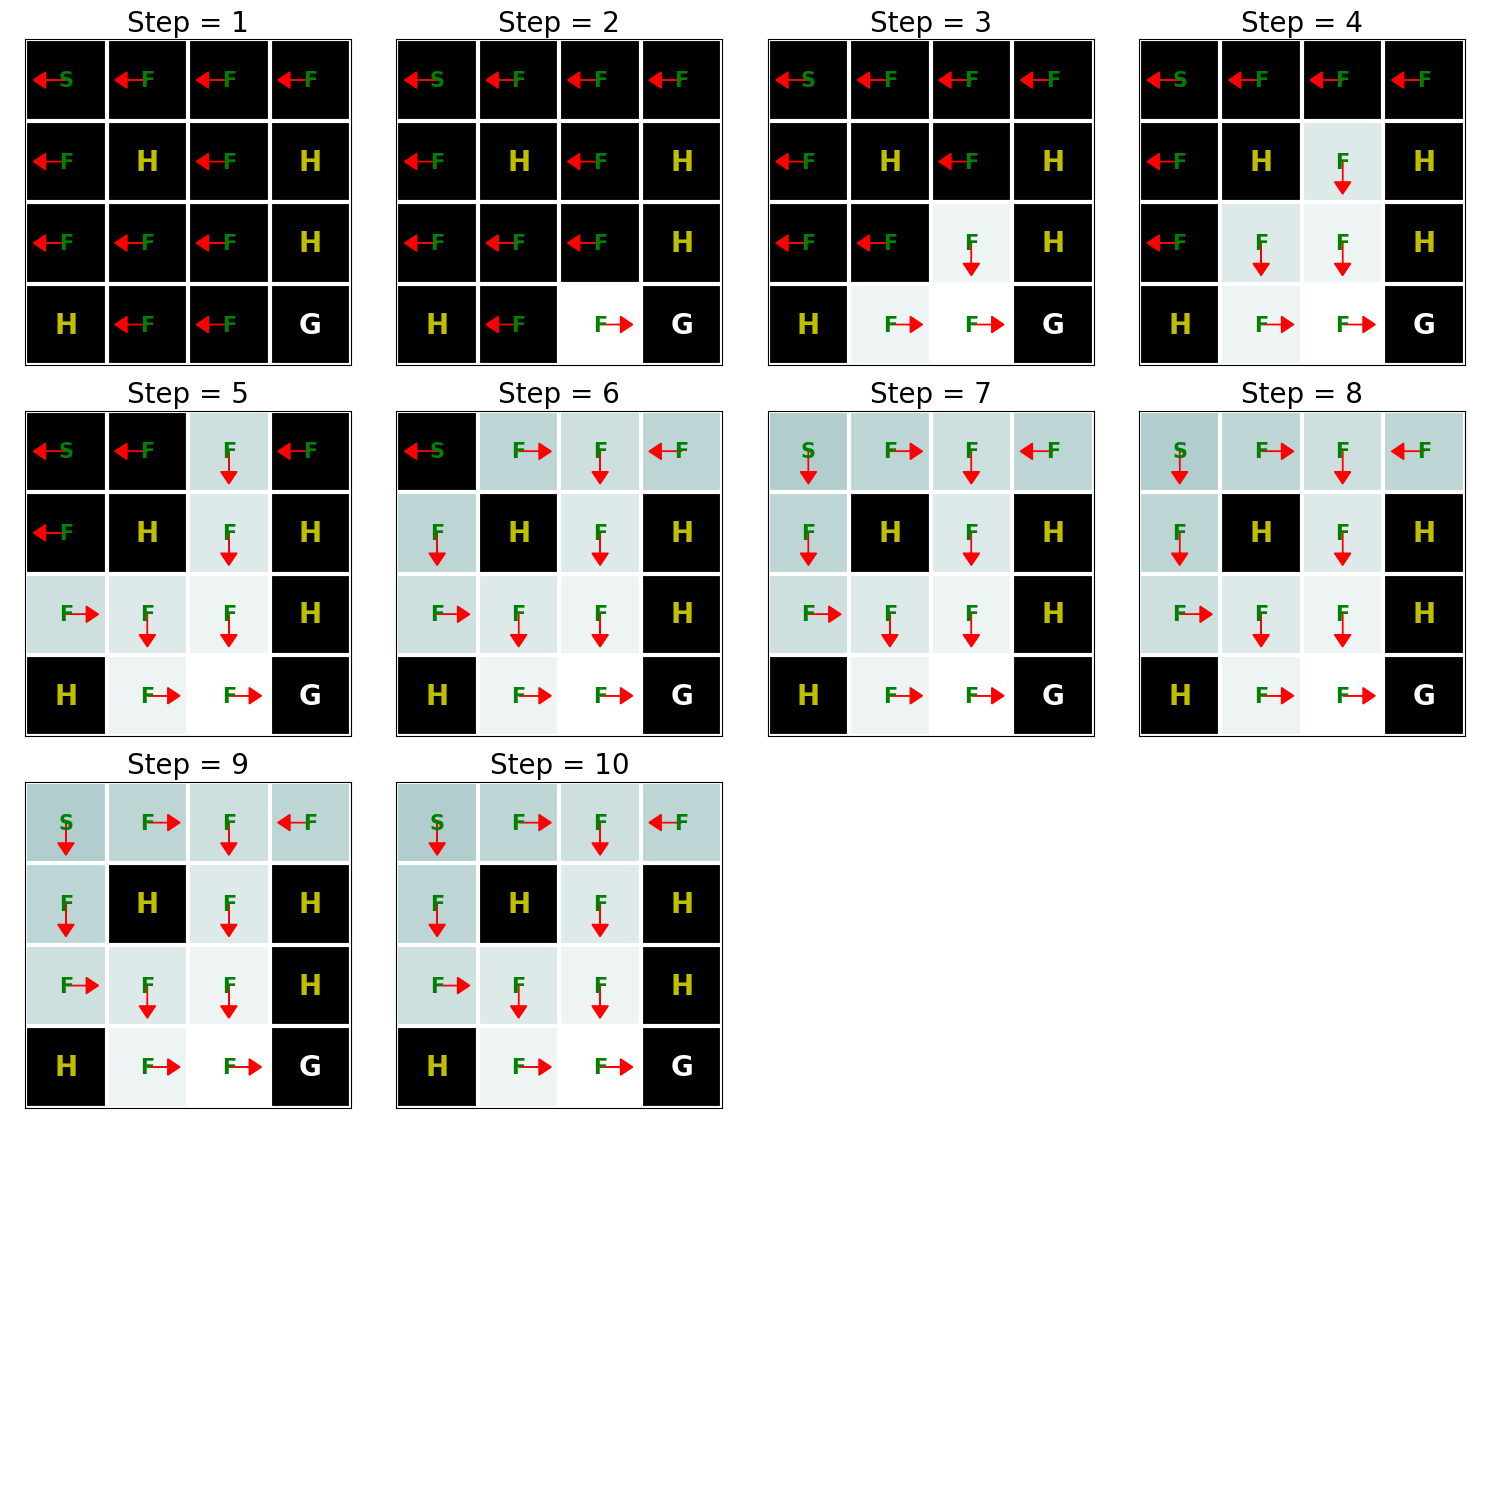

In [ ]:
V, Q, pi = value_iteration(env_info=env_info, gamma=gamma, num_iters=num_iters)

The above pictures show the policy (the arrow indicates the action) and value function (the change in color shows how the value function changes over time from the initial value shown by dark color to the optimal value shown by light colors.). As we see, Value Iteration finds the optimal value function after 10 iterations and the goal state (G) can be reached starting from any state as long as it is not an H cell. Another interesting aspect of the implementation is that in addition to finding the optimal value function, we also automatically found the optimal policy $\pi^*$ corresponding to this value function.

In [ ]:
V.shape

(11, 16)

In [ ]:
Q.shape

(11, 16, 4)

In [ ]:
pi.shape

(11, 16)

In [ ]:
idx = -1
print(V[idx])
print(Q[idx])
print(pi[idx])

[0.77378094 0.81450625 0.857375   0.81450625 0.81450625 0.
 0.9025     0.         0.857375   0.9025     0.95       0.
 0.         0.95       1.         0.        ]
[[0.73509189 0.77378094 0.77378094 0.73509189]
 [0.73509189 0.         0.81450625 0.77378094]
 [0.77378094 0.857375   0.77378094 0.81450625]
 [0.81450625 0.         0.77378094 0.77378094]
 [0.77378094 0.81450625 0.         0.73509189]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.         0.81450625]
 [0.         0.         0.         0.        ]
 [0.81450625 0.         0.857375   0.77378094]
 [0.81450625 0.9025     0.9025     0.        ]
 [0.857375   0.95       0.         0.857375  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.95       0.857375  ]
 [0.9025     0.95       1.         0.9025    ]
 [0.         0.         0.         0.        ]]
[1. 2. 1. 0. 1. 0. 1. 0. 2. 1. 1. 0. 0. 2. 2. 0.]


**Action Space**
- 0: Move left
- 1: Move down
- 2: Move right
- 3: Move up

**Observation Space**

The observation is a value representing the player’s current position as current_row * ncols + current_col (where both the row and col start at 0).

`state = current_row * ncols + current_col`

The value function `V[s]` represents the maximum expected cumulative reward for each state `s` when following the optimal policy.

- `V[0]=0.77378094`: If the agent starts in state 0, it can achieve an expected cumulative reward of approximately 
- `V[5]=0.0`: If the agent starts in state 5, it cannot accumulate any rewards, likely because it’s a terminal or non-rewarding state.
- `V[14]=1.0`: State 14 has the highest expected value, which indicates it is the most rewarding or goal state.

The state-action value Function `Q[s, a]` represents the expected cumulative reward of taking action `a` in state `s`, and then following the optimal policy afterward.

- `Q[0, 0] = 0.73509189` means if the agent starts in state 0 and takes action 0, its expected cumulative reward is approximately 0.735.
- `Q[14, 2] = 1.0` means if the agent starts in state 14 and takes action 2, its expected cumulative reward is 1.0, which is the optimal reward for that state.

For each state `s`, the action `a` with the highest `Q[s, a]` determines the optimal policy.

The policy `pi[s]` specifies the optimal action to take in each state `s` to maximize cumulative rewards.

- `pi[0] = 1`: In state 0, the optimal action is 1.
- `pi[6] = 1`: In state 6, the optimal action is 1.
- `pi[14] = 2`: In state 14, the optimal action is 2, which is consistent with the highest `Q[14, 2] = 1.0`.

The policy ensures that the agent takes actions that lead to the highest possible reward in each state.